Cluster 4 (빈도수: 152):
Keyword: 방문
Summary: TV프로그램통해 방문 안 한 곳이 있어 방문
Sentences:
- TV프로그램통해 방문 안 한 곳이 있어 방문
- 가격이 저렴해서
- 가고싶은곳이 있어서
- 가까워서
- 가까이있고 드라이브하기 좋아서
- 가보지못한곳이 많아서
- 강원도를 남편이 좋아해서 일년에 두번씩 갑니다 그래서 항상 들리는곳 지나가는 곳이 울진입니다 밥도 먹고 쇼핑도 하고 구경도하고요
- 게먹으러
- 공기도좋고 구경도할겸
- 관광지가 제일 선호해서
- 관광지가 좋아서
- 구경거리가 많아서
- 그냥
- 깨끗하고 조용하고 바다도 예쁘고 힐링하기 좋은 도시라서
- 깨끗한 바다와 시원한해안도로 축제
- 꼭 가보고 싶은곳과 해보고싶은것이 있어서
- 낚시 및 캠핑
- 너무 좋아서
- 너무좋았어서
- 늘 다니는곳
- 다니기 좋아서
- 대개도 먹고 아들도보고 죽변맛집 물회도먹고 티비에 나오는 후포항에서 회도먹기 위해서
- 데이트
- 도로가 잘되어있고 바다가 좋으며 아이들과 즐길거리가 많아서 매년 방문합니다
- 동행인이 원해서
- 드라이브코스. 사진찍기. 여행. 캠핑. 낚시 등등
- 또가고싶은곳이 있어서
- 만족
- 만족
- 맑은 공기와 아름다운 풍경의 힐링 여행
- 맑은공기
- 맑은공기, 바다
- 맛있는 음식 먹고싶어서
- 맛있는 음식 먹으로
- 맛있는 음식을 먹기 위해
- 맛있는게 많고 자연환경이 좋아서
- 맛집과 온천
- 맛집탐방
- 매년가던곳이있어서
- 먹거리
- 먹거리가 많아서
- 먹거리가 풍부해서
- 먹거리와 힐링
- 멋진 동해안
- 멋진곳으로 좋아서요
- 모노레일 탑승을 위해
- 물놀이. 친척집 방문
- 물이 좋고 음식이 맛있어서
- 바다가 깨끗하고 한적해서 좋아요 그리고 다른 관광지와 비교시 물가가 저렴해요
- 바다가 아름답고 공기가 좋아서. 아쿠아리움 방문
- 바다만좋아서 매년 가고 있는데 갈때마다 좋아요 첫 방문은 2014년인데 15,16,17 제외하곤 매년 가고있습니다 심각하게 울진으로 이사도 고려했을만큼 너

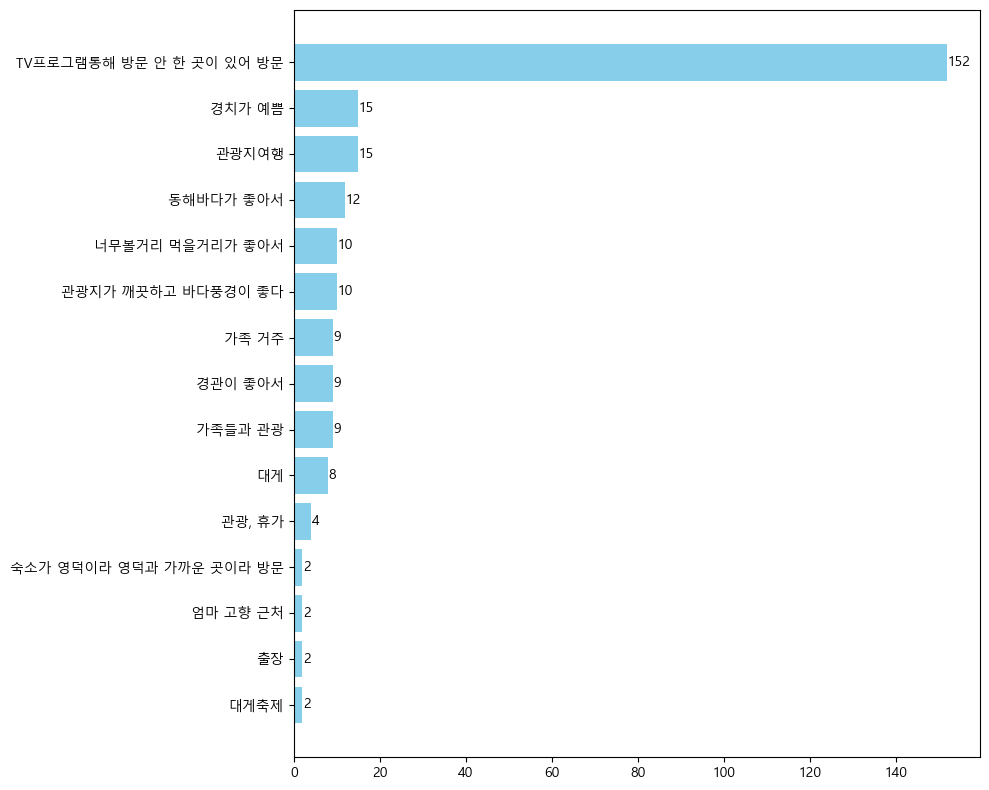

Cluster summary frequency graph saved to data\Q1_2\cluster_summary_frequency.png


In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from konlpy.tag import Okt
import pandas as pd
import os
import matplotlib.pyplot as plt

# 텍스트 파일 경로 설정
text_file_path = 'data/Q1_2.txt'

# 한글 폰트 경로 설정
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로
fontprop = fm.FontProperties(fname=font_path)
plt.rc('font', family='Malgun Gothic')


# 1. 데이터 로드
with open(text_file_path, 'r', encoding='utf-8') as file:
    sentences = file.readlines()

# 2. 전처리
sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

# 불필요한 단어들 제거
filtered_sentences = [sentence.lower() for sentence in sentences if sentence.lower() not in ['없음', '모름', '없다', '기억안남', '모르겠다', '없어요', '생각안남', '없습니다', '특별히', '이름이', '감사합니다']]

# 3. 명사 추출을 위한 Okt 객체 생성
okt = Okt()

def extract_nouns(text):
    nouns = okt.nouns(text)
    return ' '.join(nouns)

# 문장마다 명사만 추출
nouns_sentences = [extract_nouns(sentence) for sentence in sentences]

# 4. TF-IDF 벡터화 (명사에 대해서만)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(nouns_sentences)

# 5. 클러스터링
num_clusters = 15  # 클러스터 수는 데이터에 따라 조정할 수 있음
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# 6. 각 클러스터의 대표 문장 및 핵심 키워드 추출
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

clustered_sentences = [[] for _ in range(num_clusters)]
for i, label in enumerate(kmeans.labels_):
    clustered_sentences[label].append(sentences[i])

keywords = []
for i in range(num_clusters):
    # 각 클러스터에서 TF-IDF 가중치가 가장 높은 단어(명사)를 추출
    key_term = terms[order_centroids[i, 0]]
    keywords.append(key_term)

# 7. 클러스터 빈도수 계산 및 내림차순 정렬
cluster_frequencies = [(i, len(cluster)) for i, cluster in enumerate(clustered_sentences)]
sorted_clusters = sorted(cluster_frequencies, key=lambda x: x[1], reverse=True)

# 8. 결과 요약 출력 (클러스터의 모든 문장 포함) 및 엑셀로 저장
# 결과를 저장할 리스트 생성
excel_data = []
summary_data = []

for cluster_index, freq in sorted_clusters:
    key = keywords[cluster_index]
    cluster = clustered_sentences[cluster_index]
    summary_sentence = cluster[0] if cluster else "No summary available"
    print(f"Cluster {cluster_index + 1} (빈도수: {freq}):")
    print(f"Keyword: {key}")
    print(f"Summary: {summary_sentence}")  # 대표 문장을 요약으로 사용
    print("Sentences:")
    excel_data.append([f"Cluster {cluster_index + 1} (빈도수: {freq})", f"Keyword: {key}", f"Summary: {summary_sentence}"])
    summary_data.append((summary_sentence, freq))
    for sentence in cluster:
        print(f"- {sentence}")
        excel_data.append(["", "", f"- {sentence}"])
    print("\n")
    excel_data.append(["", "", ""])  # 클러스터 간의 빈 줄 추가

# 저장 폴더 경로 설정
save_folder = os.path.join('data', os.path.splitext(os.path.basename(text_file_path))[0])

# 폴더가 없는 경우 생성
os.makedirs(save_folder, exist_ok=True)

# 엑셀 파일 경로 설정
excel_file_path = os.path.join(save_folder, 'clustering_results.xlsx')

# 엑셀 파일로 저장
df = pd.DataFrame(excel_data, columns=["", "", ""])
df.to_excel(excel_file_path, index=False, header=False)

print(f"Clustering results saved to {excel_file_path}")

# 9. Summary를 변수로 하여 가로 막대 그래프 생성 (빈도수가 높은 순으로 정렬)
summary_sentences, frequencies = zip(*sorted(summary_data, key=lambda x: x[1], reverse=True))

plt.figure(figsize=(10, 8))
bars = plt.barh(summary_sentences, frequencies, color='skyblue')
# plt.xlabel('Frequency')
# plt.ylabel('Cluster Summary')
# plt.title('Cluster Summary Frequency')
plt.gca().invert_yaxis()  # 빈도수가 높은 것이 위로 오도록 설정

# 그래프에 빈도수 표시
for bar, freq in zip(bars, frequencies):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, str(freq), va='center')

plt.tight_layout()

# 그래프 저장
graph_file_path = os.path.join(save_folder, 'cluster_summary_frequency.png')
plt.savefig(graph_file_path)
plt.show()

print(f"Cluster summary frequency graph saved to {graph_file_path}")
